In [ ]:
import numpy as np
import pandas as pd
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import tensorflow as tf


In [ ]:
dataset=pd.read_csv("/content/sample_data/AIR (1).csv", index_col=0)
dataset

,pm25,pm10,no2,o3,so2,co,temp,rhum,wspd,pres,coco,pm25_AQI,pm10_AQI,no2_AQI,o3_AQI,so2_AQI,overall_AQI
data-time,,,,,,,,,,,,,,,,,
2020-05-10 5:00,58.034210,110.055560,13.585500,52.262104,11.142777,771.05260,34.3,53,14.8,1006.3,2,5,5,1,2,1,5
2020-05-10 6:00,58.122580,119.764640,13.946207,46.129310,12.405385,776.62415,36.4,47,11.2,1006.5,2,5,5,1,1,1,5
2020-05-10 7:00,58.029293,117.268555,13.009876,50.262165,11.643125,744.78455,36.3,46,13.0,1006.1,2,5,5,1,1,1,5
2020-05-10 8:00,57.566273,120.596770,13.470699,56.497150,12.205358,787.17240,37.1,43,11.1,1005.6,2,5,5,1,2,1,5
2020-05-10 9:00,52.736923,117.967780,10.979615,43.265000,9.713333,882.08330,27.2,66,13.0,1008.3,2,5,5,1,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-01 20:00,58.000000,97.247260,21.684875,19.913027,10.997194,1034.19400,29.0,91,0.0,1007.7,2,5,4,1,1,1,5
2021-10-01 21:00,58.000000,96.377594,21.543179,19.888464,11.030029,1027.37370,29.0,94,0.0,1008.6,2,5,4,1,1,1,5
2021-10-01 22:00,50.000000,95.480870,21.432848,19.918104,11.053946,1023.47595,28.9,91,1.8,1007.6,2,4,4,1,1,1,4


In [ ]:
# split data
from sklearn.model_selection import train_test_split

features=dataset.values
targets=dataset[["pm25", "pm10", "no2", "o3", "so2"]].values

X_train, X_test, y_train, y_test  = train_test_split(features, targets, test_size=0.1, random_state=1, shuffle=False)

X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.1, random_state=1, shuffle=False)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)

X_train: (9910, 17)
X_test: (1224, 17)


In [ ]:
# normalize 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)

X_val = scaler.transform(X_val)

X_test = scaler.transform(X_test)

X_train.shape, X_test.shape

((9910, 17), (1224, 17))

In [ ]:
#Setup timeseries generator
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

win_length=12
batch_size=4
num_features=features.shape[1]

train_generator = TimeseriesGenerator(X_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
val_generator = TimeseriesGenerator(X_val, y_val, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(X_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

train_generator[0]


(array([[[0.56365065, 0.2729785 , 0.03717567, 0.13531226, 0.0250287 ,
          0.97324538, 0.70657277, 0.46590909, 0.12111293, 0.50147493,
          0.04166667, 0.8       , 0.8       , 0.        , 0.2       ,
          0.        , 0.8       ],
         [0.56369777, 0.27946918, 0.03774063, 0.1326113 , 0.02786475,
          0.97326491, 0.75586854, 0.39772727, 0.09165303, 0.50737463,
          0.04166667, 0.8       , 0.8       , 0.        , 0.        ,
          0.        , 0.8       ],
         [0.56364803, 0.27780051, 0.0362741 , 0.13443146, 0.02615257,
          0.97315325, 0.75352113, 0.38636364, 0.10638298, 0.49557522,
          0.04166667, 0.8       , 0.8       , 0.        , 0.        ,
          0.        , 0.8       ],
         [0.56340113, 0.28002548, 0.03699586, 0.13717743, 0.02741545,
          0.97330191, 0.77230047, 0.35227273, 0.0908347 , 0.48082596,
          0.04166667, 0.8       , 0.8       , 0.        , 0.2       ,
          0.        , 0.8       ],
         [0.56082593

#cnn model

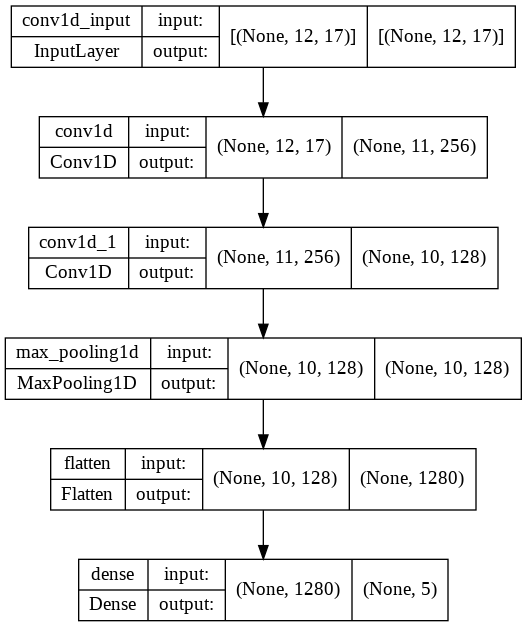

In [ ]:
model_CNN = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=256, kernel_size=2, activation=tf.keras.layers.LeakyReLU(alpha=0.3), input_shape=(win_length, num_features)),
    tf.keras.layers.Conv1D(filters=128, kernel_size=2, activation=tf.keras.layers.LeakyReLU(alpha=0.3)),
    tf.keras.layers.MaxPooling1D(pool_size=1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(targets.shape[1])
])

model_CNN.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001),loss=tf.losses.MeanSquaredLogarithmicError())

tf.keras.utils.plot_model(model=model_CNN, show_shapes=True)

In [ ]:
lr_monitor = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=3, factor=0.5, cooldown=1)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=15, restore_best_weights=True)

with tf.device('/GPU:0'):
    prepared_model_CNN = model_CNN.fit(train_generator, 
                                       validation_data=test_generator,
                                       epochs=400, 
                                       shuffle=False,  
                                       callbacks=[lr_monitor, early_stopping])

Epoch 1/400
2475/2475 [==============================] - 14s 5ms/step - loss: 5.3039 - val_loss: 1.3194 - lr: 0.0010
Epoch 2/400
2475/2475 [==============================] - 12s 5ms/step - loss: 0.8474 - val_loss: 0.2604 - lr: 0.0010
Epoch 3/400
2475/2475 [==============================] - 14s 5ms/step - loss: 0.1939 - val_loss: 0.2519 - lr: 0.0010
Epoch 4/400
2475/2475 [==============================] - 13s 5ms/step - loss: 0.1823 - val_loss: 0.2866 - lr: 0.0010
Epoch 5/400
2475/2475 [==============================] - 13s 5ms/step - loss: 0.1771 - val_loss: 0.2726 - lr: 0.0010
Epoch 6/400
2475/2475 [==============================] - 14s 6ms/step - loss: 0.1718 - val_loss: 0.2526 - lr: 0.0010
Epoch 7/400
2475/2475 [==============================] - 14s 6ms/step - loss: 0.1666 - val_loss: 0.1680 - lr: 5.0000e-04
Epoch 8/400
2475/2475 [==============================] - 13s 5ms/step - loss: 0.1628 - val_loss: 0.1632 - lr: 5.0000e-04
Epoch 9/400
2475/2475 [==============================] -

Text(0, 0.5, 'mse score')

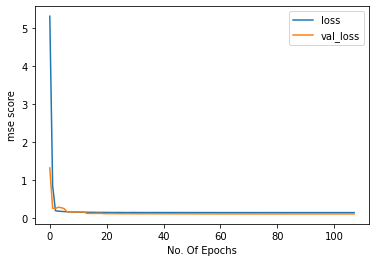

In [ ]:
plt.plot(prepared_model_CNN.history["loss"],label="loss")
plt.plot(prepared_model_CNN.history["val_loss"],label="val_loss")
plt.legend(loc="best")
plt.xlabel("No. Of Epochs")
plt.ylabel("mse score")

In [ ]:
#GET PREDICTIONS
predictions=model_CNN.predict(test_generator)

pd.DataFrame(predictions)

,0,1,2,3,4
0,20.424973,45.620396,15.448529,35.561169,8.873908
1,20.346947,42.682636,16.274084,35.042439,8.154157
2,18.851286,43.244404,16.750410,33.179455,8.950369
3,20.541117,44.483746,16.422720,32.963348,8.313383
4,15.816377,36.072556,17.453136,31.506863,8.275397
...,...,...,...,...,...
1207,37.489407,74.182678,24.938631,22.107725,10.548226
1208,44.849010,83.360107,26.612968,20.341705,9.784176
1209,47.923496,86.157112,26.743477,19.451452,9.695135
1210,42.361073,74.583000,25.428911,19.118891,10.460976


In [ ]:
df_pred=pd.DataFrame(X_test[:,:][win_length:])

rev_trans=scaler.inverse_transform(df_pred)

df_final=dataset[rev_trans.shape[0]*-1:]

df_final[["pm25_pred", "pm10_pred", "no2_pred", "o3_pred", "so2_pred"]]=predictions
df_final

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,pm25,pm10,no2,o3,so2,co,temp,rhum,wspd,pres,...,pm10_AQI,no2_AQI,o3_AQI,so2_AQI,overall_AQI,pm25_pred,pm10_pred,no2_pred,o3_pred,so2_pred
data-time,,,,,,,,,,,,,,,,,,,,,
2021-08-12 13:00,22.936932,24.773973,17.878206,27.673174,9.682981,860.35200,35.6,57,5.5,1000.4,...,2,1,1,1,3,20.424973,45.620396,15.448529,35.561169,8.873908
2021-08-12 14:00,22.775126,24.278646,17.855543,27.739470,9.688558,859.93740,34.9,60,3.7,1000.8,...,2,1,1,1,3,20.346947,42.682636,16.274084,35.042439,8.154157
2021-08-12 15:00,21.930166,23.018396,17.832579,27.807625,9.694173,859.50543,33.8,68,0.0,1001.3,...,2,1,1,1,3,18.851286,43.244404,16.750410,33.179455,8.950369
2021-08-12 16:00,20.642754,22.154228,17.809309,27.877730,9.699825,859.05493,33.3,70,0.0,1001.6,...,2,1,1,1,2,20.541117,44.483746,16.422720,32.963348,8.313383
2021-08-12 17:00,19.504057,21.790426,17.785725,27.949884,9.705510,858.58453,32.8,73,1.8,1002.0,...,2,1,1,1,2,15.816377,36.072556,17.453136,31.506863,8.275397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-01 20:00,58.000000,97.247260,21.684875,19.913027,10.997194,1034.19400,29.0,91,0.0,1007.7,...,4,1,1,1,5,37.489407,74.182678,24.938631,22.107725,10.548226
2021-10-01 21:00,58.000000,96.377594,21.543179,19.888464,11.030029,1027.37370,29.0,94,0.0,1008.6,...,4,1,1,1,5,44.849010,83.360107,26.612968,20.341705,9.784176
2021-10-01 22:00,50.000000,95.480870,21.432848,19.918104,11.053946,1023.47595,28.9,91,1.8,1007.6,...,4,1,1,1,4,47.923496,86.157112,26.743477,19.451452,9.695135


#CNN-LSTM MODEL

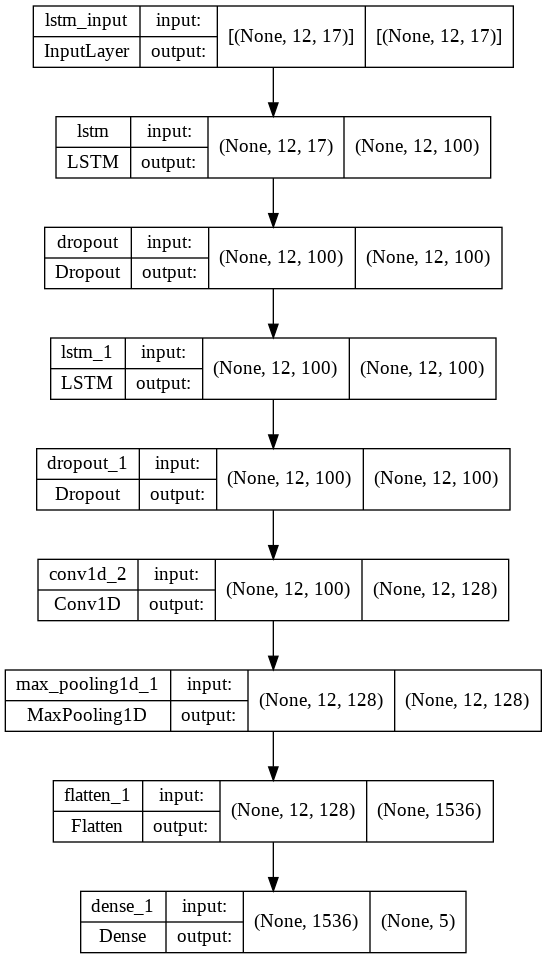

In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
from keras.models import Sequential
from keras.layers import Dense, Dropout,LSTM 
from keras.layers import Input
model_LSTMCNN = Sequential()

model_LSTMCNN.add(LSTM(100,return_sequences=True, input_shape=(win_length, num_features)))
model_LSTMCNN.add(Dropout(0.5))
model_LSTMCNN.add(LSTM(100,return_sequences=True, input_shape=(win_length, num_features)))
model_LSTMCNN.add(Dropout(0.7))

model_LSTMCNN.add(layers.Conv1D(filters=128, kernel_size=1, activation=tf.keras.layers.LeakyReLU(alpha=0.7)))
model_LSTMCNN.add(layers.MaxPooling1D(pool_size=1))

model_LSTMCNN.add(layers.Flatten())
model_LSTMCNN.add(layers.Dense(targets.shape[1]))


model_LSTMCNN.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001),loss=tf.losses.MeanSquaredLogarithmicError())

tf.keras.utils.plot_model(model=model_LSTMCNN, show_shapes=True)

In [ ]:
lr_monitor = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=3, factor=0.5, cooldown=1)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=15, restore_best_weights=True)

with tf.device('/GPU:0'):
    prepared_model_LSTMCNN = model_LSTMCNN.fit(train_generator, 
                                       validation_data=test_generator,
                                       epochs=400, 
                                       shuffle=False,  
                                       callbacks=[lr_monitor, early_stopping])

Epoch 1/400
2475/2475 [==============================] - 52s 21ms/step - loss: 0.4251 - val_loss: 0.4482 - lr: 0.0010
Epoch 2/400
2475/2475 [==============================] - 49s 20ms/step - loss: 0.2389 - val_loss: 0.4469 - lr: 0.0010
Epoch 3/400
2475/2475 [==============================] - 49s 20ms/step - loss: 0.3604 - val_loss: 0.4273 - lr: 0.0010
Epoch 4/400
2475/2475 [==============================] - 50s 20ms/step - loss: 0.2463 - val_loss: 0.4128 - lr: 0.0010
Epoch 5/400
2475/2475 [==============================] - 55s 22ms/step - loss: 0.2443 - val_loss: 0.3869 - lr: 0.0010
Epoch 6/400
2475/2475 [==============================] - 54s 22ms/step - loss: 0.4106 - val_loss: 0.3697 - lr: 0.0010
Epoch 7/400
2475/2475 [==============================] - 49s 20ms/step - loss: 0.2331 - val_loss: 0.3092 - lr: 0.0010
Epoch 8/400
2475/2475 [==============================] - 53s 22ms/step - loss: 0.2188 - val_loss: 0.2572 - lr: 0.0010
Epoch 9/400
2475/2475 [==============================] -

Text(0, 0.5, 'mse score')

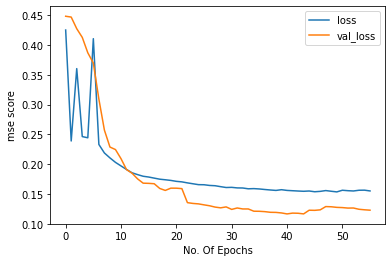

In [ ]:
plt.plot(prepared_model_LSTMCNN.history["loss"],label="loss")
plt.plot(prepared_model_LSTMCNN.history["val_loss"],label="val_loss")
plt.legend(loc="best")
plt.xlabel("No. Of Epochs")
plt.ylabel("mse score")

In [ ]:
predictions=model_CNN.predict(test_generator)

pd.DataFrame(predictions)

,0,1,2,3,4
0,20.424973,45.620396,15.448529,35.561169,8.873908
1,20.346947,42.682636,16.274084,35.042439,8.154157
2,18.851286,43.244404,16.750410,33.179455,8.950369
3,20.541117,44.483746,16.422720,32.963348,8.313383
4,15.816377,36.072556,17.453136,31.506863,8.275397
...,...,...,...,...,...
1207,37.489407,74.182678,24.938631,22.107725,10.548226
1208,44.849010,83.360107,26.612968,20.341705,9.784176
1209,47.923496,86.157112,26.743477,19.451452,9.695135
1210,42.361073,74.583000,25.428911,19.118891,10.460976


In [ ]:
df_pred=pd.DataFrame(X_test[:,:][win_length:])

rev_trans=scaler.inverse_transform(df_pred)

df_final=dataset[rev_trans.shape[0]*-1:]

df_final[["pm25_pred", "pm10_pred", "no2_pred", "o3_pred", "so2_pred"]]=predictions
df_final

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,pm25,pm10,no2,o3,so2,co,temp,rhum,wspd,pres,...,pm10_AQI,no2_AQI,o3_AQI,so2_AQI,overall_AQI,pm25_pred,pm10_pred,no2_pred,o3_pred,so2_pred
data-time,,,,,,,,,,,,,,,,,,,,,
2021-08-12 13:00,22.936932,24.773973,17.878206,27.673174,9.682981,860.35200,35.6,57,5.5,1000.4,...,2,1,1,1,3,20.424973,45.620396,15.448529,35.561169,8.873908
2021-08-12 14:00,22.775126,24.278646,17.855543,27.739470,9.688558,859.93740,34.9,60,3.7,1000.8,...,2,1,1,1,3,20.346947,42.682636,16.274084,35.042439,8.154157
2021-08-12 15:00,21.930166,23.018396,17.832579,27.807625,9.694173,859.50543,33.8,68,0.0,1001.3,...,2,1,1,1,3,18.851286,43.244404,16.750410,33.179455,8.950369
2021-08-12 16:00,20.642754,22.154228,17.809309,27.877730,9.699825,859.05493,33.3,70,0.0,1001.6,...,2,1,1,1,2,20.541117,44.483746,16.422720,32.963348,8.313383
2021-08-12 17:00,19.504057,21.790426,17.785725,27.949884,9.705510,858.58453,32.8,73,1.8,1002.0,...,2,1,1,1,2,15.816377,36.072556,17.453136,31.506863,8.275397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-01 20:00,58.000000,97.247260,21.684875,19.913027,10.997194,1034.19400,29.0,91,0.0,1007.7,...,4,1,1,1,5,37.489407,74.182678,24.938631,22.107725,10.548226
2021-10-01 21:00,58.000000,96.377594,21.543179,19.888464,11.030029,1027.37370,29.0,94,0.0,1008.6,...,4,1,1,1,5,44.849010,83.360107,26.612968,20.341705,9.784176
2021-10-01 22:00,50.000000,95.480870,21.432848,19.918104,11.053946,1023.47595,28.9,91,1.8,1007.6,...,4,1,1,1,4,47.923496,86.157112,26.743477,19.451452,9.695135


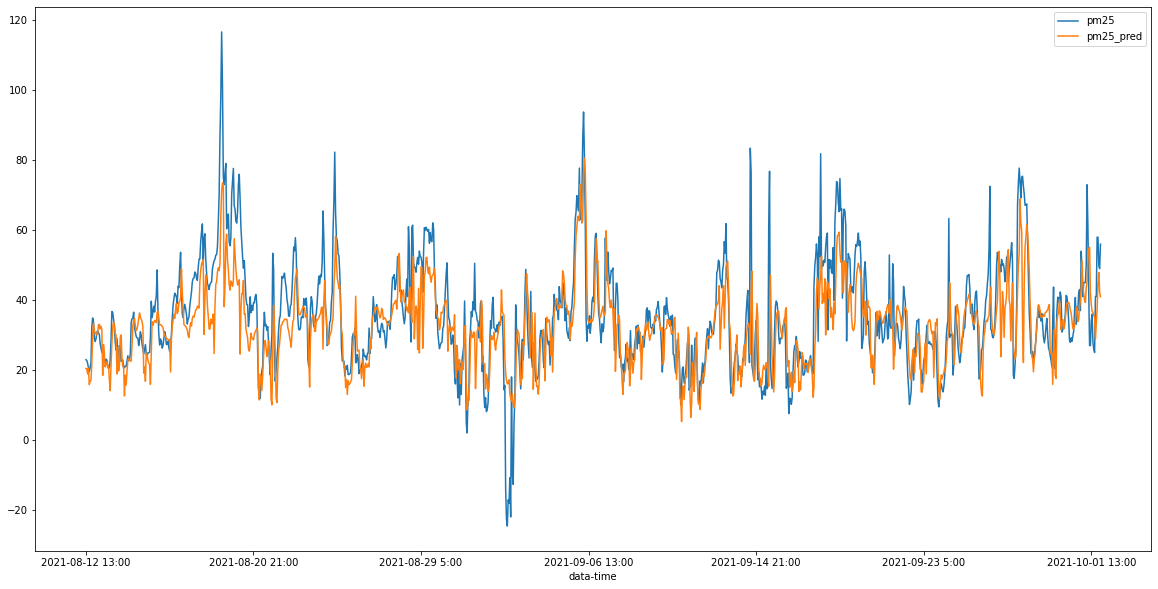

In [ ]:
df_final[["pm25","pm25_pred"]].plot(figsize=(20,10))

In [ ]:
def evaluate_preds(y_true, y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Calculate various metrics
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mslr = tf.keras.metrics.mean_squared_logarithmic_error(y_true, y_pred)
  
    return {"mae": mae.numpy(),
            "mse": mse.numpy(),
            "rmse": rmse.numpy(),
            "mape": mape.numpy(),
            "mslr": mslr.numpy(),
           }

In [ ]:
selected_features = ["pm25", "pm10", "no2", "o3", "so2"]

for feature in selected_features:
    print("-----{}-----".format(feature))
    print(evaluate_preds(y_true=df_final[feature].values,
                         y_pred=df_final["{}_pred".format(feature)].values)
         )
    
#CNNLSTM

-----pm25-----
{'mae': 7.4944024, 'mse': 110.35179, 'rmse': 10.504846, 'mape': 22.810743, 'mslr': 0.1359732}
-----pm10-----
{'mae': 13.923409, 'mse': 311.08377, 'rmse': 17.637568, 'mape': 28.306797, 'mslr': 0.09796477}
-----no2-----
{'mae': 3.7758584, 'mse': 22.875536, 'rmse': 4.782838, 'mape': 17.895008, 'mslr': 0.045602605}
-----o3-----
{'mae': 7.7194324, 'mse': 348.8417, 'rmse': 18.677305, 'mape': 29.278341, 'mslr': 0.20520796}
-----so2-----
{'mae': 2.0905743, 'mse': 17.678562, 'rmse': 4.2045884, 'mape': 21.281675, 'mslr': 0.06592379}
